In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC

**Read in Data**

In [ ]:
weed = pd.read_csv("https://www.dropbox.com/s/s2a1uoiegitupjc/cannabis_full.csv?dl=1")
weed.head()

,Strain,Type,Rating,Effects,Flavor,Creative,Energetic,Tingly,Euphoric,Relaxed,...,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange",0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
weed.info()

In [ ]:
weed = weed.dropna()

***Part One: Binary Classification***

Create a dataset that is limited only to the Sativa and Indica type cannabis strains.

This section asks you to create a final best model for each of the four new model types studied this week: LDA, QDA, SVC, and SVM. For SVM, you may limit yourself to only the polynomial kernel.

For each, you should:

* Choose a metric you will use to select your model, and briefly justify your choice. (Hint: There is no specific target category here, so this should not be a metric that only prioritizes one category.)

* Find the best model for predicting the Type variable. Don’t forget to tune any hyperparameters.

* Report the (cross-validated!) metric.

* Fit the final model.

* Output a confusion matrix.

In [ ]:
weed = weed.drop(['Flavor', 'Effects', 'Strain'], axis=1)

In [ ]:
indtiva = weed[weed['Type'].isin(['sativa', 'indica'])]
X = indtiva.drop(['Type'], axis = 1)
y = indtiva['Type']

**Q1: LDA**

In [ ]:
ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         make_column_selector(dtype_include=['category', 'object']))
    ],
    remainder="passthrough"
)

lda_pipeline = Pipeline([
  ("preprocessing", ct),
  ("LDA", LinearDiscriminantAnalysis())]
)
lda_pipeline_fitted = lda_pipeline.fit(X,y)
lda_accuracy = cross_val_score(lda_pipeline_fitted, X, y, cv=5, scoring='accuracy').mean()
print(f"LDA Accuracy: {lda_accuracy}")

LDA Accuracy: 0.8425808776425369


In [ ]:
y_pred = lda_pipeline_fitted.predict(X)
print("LDA Confusion Matrix:")
confusion_matrix(y, y_pred)

LDA Confusion Matrix:


array([[627,  60],
       [ 86, 345]])

**Q2: QDA**

In [ ]:
qda_pipeline = Pipeline([
  ("preprocessing", ct),
  ("QDA", QuadraticDiscriminantAnalysis())]
)

qda_pipeline_fitted = qda_pipeline.fit(X,y)
qda_accuracy = cross_val_score(qda_pipeline_fitted, X, y, cv=5, scoring='accuracy').mean()

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [ ]:
print(f"QDA Accuracy: {qda_accuracy}")

QDA Accuracy: 0.4141295643818065


In [ ]:
y_pred = qda_pipeline_fitted.predict(X)
print("QDA Confusion Matrix:")
confusion_matrix(y, y_pred)

QDA Confusion Matrix:


array([[ 27, 660],
       [  0, 431]])

**Q3: SVC**

In [ ]:
svc_pipeline = Pipeline([
    ("preprocessing", ct),
    ("svc", SVC())])

c_values = [2,3,4]
c_param = {'svc__C': c_values}
gscv = GridSearchCV(svc_pipeline, c_param, cv = 5, scoring='accuracy')

gscv_fitted = gscv.fit(X,y)
best_accuracy = np.max(gscv_fitted.cv_results_['mean_test_score'])
best_c_value = gscv_fitted.best_params_['svc__C']
print("Best Accuracy Score:", best_accuracy)
print("Corresponding C-Value:", best_c_value)

Best Accuracy Score: 0.8577874759769377
Corresponding C-Value: 3


In [ ]:
svc_pipeline = Pipeline([
    ("preprocessing", ct),
    ("svc", SVC(C=3))])

svc_accuracy = cross_val_score(svc_pipeline, X, y, cv=5, scoring='accuracy').mean()
print(f"SVC Accuracy: {svc_accuracy}")

SVC Accuracy: 0.8577874759769377


In [ ]:
svc_pipeline_fitted = svc_pipeline.fit(X,y)
y_pred = svc_pipeline_fitted.predict(X)
print("SVC Confusion Matrix:")
confusion_matrix(y, y_pred)

SVC Confusion Matrix:


array([[641,  46],
       [ 72, 359]])

**Q4: SVM**

In [ ]:
svm_pipeline = Pipeline([
    ("preprocessing", ct),
    ("svm", SVC(kernel = 'poly'))])

c_values = [.6,.7,.8]
c_param = {'svm__C': c_values}
gscv = GridSearchCV(svm_pipeline, c_param, cv = 5, scoring='accuracy')

gscv_fitted = gscv.fit(X,y)
best_accuracy = np.max(gscv_fitted.cv_results_['mean_test_score'])
best_c_value = gscv_fitted.best_params_['svm__C']
print("Best Accuracy Score:", best_accuracy)
print("Corresponding C-Value:", best_c_value)

Best Accuracy Score: 0.8577914798206278
Corresponding C-Value: 0.7


In [ ]:
svm_pipeline = Pipeline([
    ("preprocessing", ct),
    ("svm", SVC(C=.7, kernel = 'poly'))])

svm_accuracy = cross_val_score(svm_pipeline, X, y, cv=5, scoring='accuracy').mean()
print(f"SVM Accuracy: {svm_accuracy}")

SVM Accuracy: 0.8577914798206278


In [ ]:
svm_pipeline_fitted = svm_pipeline.fit(X,y)
y_pred = svm_pipeline_fitted.predict(X)
print("SVM Confusion Matrix:")
confusion_matrix(y, y_pred)

SVM Confusion Matrix:


array([[646,  41],
       [ 92, 339]])

***Part Two: Natural Multiclass***

Now use the full dataset, including the Hybrid strains.

In [ ]:
X = weed.drop(['Type'],axis=1)
y = weed['Type']

**Q1**

Fit a decision tree, plot the final fit, and interpret the results.

In [ ]:
dt_pipeline = Pipeline([
    ("preprocessing", ct),
    ("decision_tree", DecisionTreeClassifier())
])

leaf_values = [59, 60, 61]
leaf_param = {
    'decision_tree__min_samples_leaf': leaf_values}

gscv = GridSearchCV(dt_pipeline, leaf_param, cv=5, scoring='accuracy')
gscv.fit(X, y)
acc_scores = gscv.cv_results_['mean_test_score']

best_accuracy = np.max(gscv.cv_results_['mean_test_score'])
best_min_samples_leaf = gscv.best_params_['decision_tree__min_samples_leaf']
print("Best Accuracy Score:", best_accuracy)
print("Corresponding min_samples_leaf:", best_min_samples_leaf)

Best Accuracy Score: 0.6212581344902386
Corresponding min_samples_leaf: 60


In [ ]:
dt_pipeline = Pipeline([
    ("preprocessing", ct),
    ("decision_tree", DecisionTreeClassifier(max_depth = 3, min_samples_leaf=60))
])

dt_pipeline_fitted = dt_pipeline.fit(X,y)
dt_accuracy = cross_val_score(dt_pipeline_fitted, X, y, cv=5, scoring='accuracy').mean()
print(f"DT Accuracy: {dt_accuracy}")

DT Accuracy: 0.6195227765726681


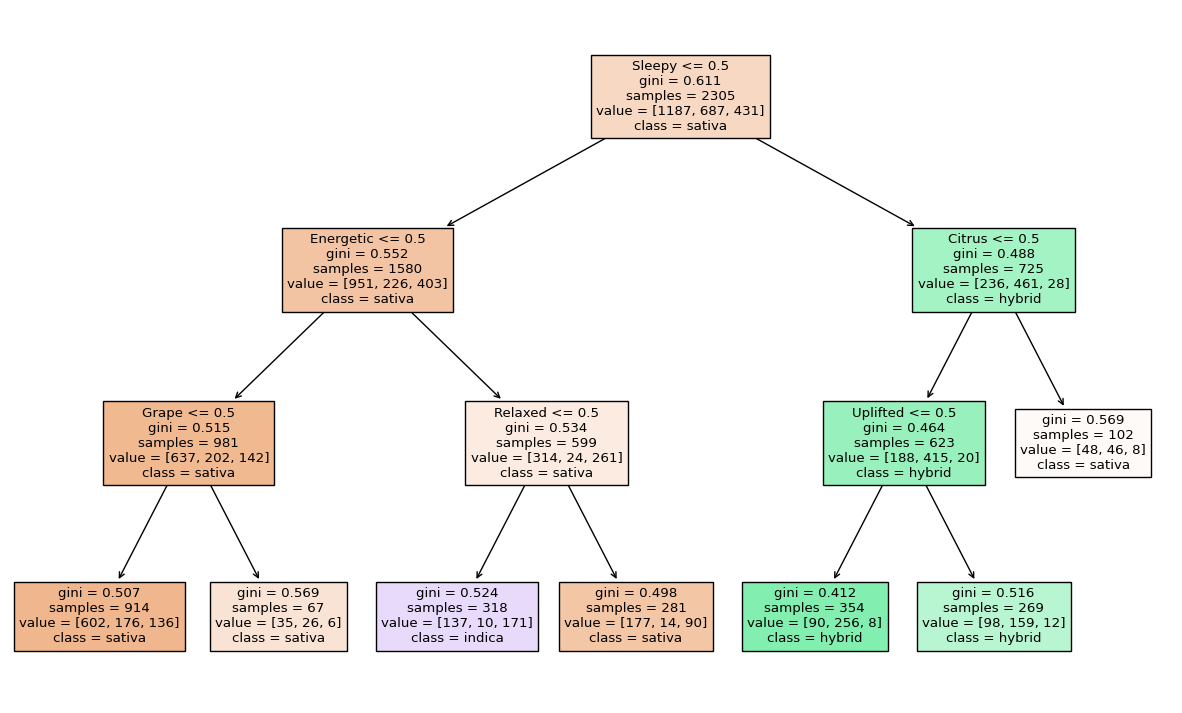

In [ ]:
plt.figure(figsize=(15, 9))
plot_tree(dt_pipeline_fitted.named_steps["decision_tree"], feature_names=X.columns.tolist(),class_names=['sativa','hybrid', 'indica'], filled=True)
plt.show()

One thing that is very evident from this decision tree is that a key determinant for classifying cannabis types is whether or not the strain makes you sleepy or not.  Another big determinant is whether the strain makes you relaxed or uplifted.

**Q2**

Repeat the analyses from Part One for LDA, QDA, and KNN.

In [ ]:
lda_pipeline = Pipeline([
  ("preprocessing", ct),
  ("LDA", LinearDiscriminantAnalysis())]
)
lda_pipeline_fitted = lda_pipeline.fit(X,y)
lda_accuracy = cross_val_score(lda_pipeline_fitted, X, y, cv=5, scoring='accuracy').mean()
print(f"LDA Accuracy: {lda_accuracy}")

LDA Accuracy: 0.6290672451193059


In [ ]:
y_pred = lda_pipeline_fitted.predict(X)
print("LDA Confusion Matrix:")
confusion_matrix(y, y_pred)

LDA Confusion Matrix:


array([[829, 211, 147],
       [211, 467,   9],
       [224,  21, 186]])

In [ ]:
qda_pipeline = Pipeline([
  ("preprocessing", ct),
  ("QDA", QuadraticDiscriminantAnalysis())]
)

qda_pipeline_fitted = qda_pipeline.fit(X,y)
qda_accuracy = cross_val_score(qda_pipeline_fitted, X, y, cv=5, scoring='accuracy').mean()

/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [ ]:
print(f"QDA Accuracy: {qda_accuracy}")

QDA Accuracy: 0.2134490238611714


In [ ]:
y_pred = qda_pipeline_fitted.predict(X)
print("QDA Confusion Matrix:")
confusion_matrix(y, y_pred)

QDA Confusion Matrix:


array([[  21,   12, 1154],
       [   6,   26,  655],
       [   0,    0,  431]])

In [ ]:
knn_pipeline = Pipeline(
    [("preprocessing", ct),
     ("knn", KNeighborsClassifier())]
)

k_values = [79, 80, 81]
k_param = {'knn__n_neighbors': k_values}
gscv = GridSearchCV(knn_pipeline, k_param, cv=5, scoring='accuracy')

gscv_fitted = gscv.fit(X, y)
accuracy_scores = gscv_fitted.cv_results_['mean_test_score']
pd.DataFrame(data={"k values": k_values, "Acc scores": accuracy_scores})

best_accuracy = np.max(gscv_fitted.cv_results_['mean_test_score'])
best_k_value = gscv_fitted.best_params_['knn__n_neighbors']
print("Best Accuracy Score:", best_accuracy)
print("Corresponding K-Value:", best_k_value)

Best Accuracy Score: 0.6052060737527115
Corresponding K-Value: 80


In [ ]:
knn_pipeline = Pipeline(
    [("preprocessing", ct),
     ("knn", KNeighborsClassifier(n_neighbors=80))]
)

knn_pipeline_fitted = knn_pipeline.fit(X,y)
knn_accuracy = cross_val_score(knn_pipeline_fitted, X, y, cv=5, scoring='accuracy').mean()
print(f"KNN Accuracy: {knn_accuracy}")

KNN Accuracy: 0.6052060737527115


In [ ]:
y_pred = knn_pipeline_fitted.predict(X)
print("KNN Confusion Matrix:")
confusion_matrix(y, y_pred)

KNN Confusion Matrix:


array([[971, 186,  30],
       [278, 406,   3],
       [369,  18,  44]])

**Q3**

Were your metrics better or worse than in Part One? Why? Which categories were most likely to get mixed up, according to the confusion matrices? Why?

The metrics for this part were worse than Part One.  This makes sense as the first part has a simpler decision boundary, in binary classification, the model only needs to distinguish vbetween 2 classes.  In this model, there are 3 distinguished classes, therefore there are more complex decision boundaries.

***Part Three: Multiclass from Binary***

Consider two models designed for binary classification: SVC and Logistic Regression.

**Q1**

Fit and report metrics for OvR versions of the models. That is, for each of the two model types, create three models:

* Indica vs. Not Indica

* Sativa vs. Not Sativa

* Hybrid vs. Not Hybrid

In [ ]:
dummies = pd.get_dummies(weed['Type'], prefix = "Type_is")
weed = weed.join(dummies)
weed.head()

,Type,Rating,Creative,Energetic,Tingly,Euphoric,Relaxed,Aroused,Happy,Uplifted,...,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear,Type_is_hybrid,Type_is_indica,Type_is_sativa
0,hybrid,4.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
1,hybrid,4.7,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
2,sativa,4.4,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1
3,hybrid,4.2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
4,hybrid,4.6,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0


**Indica vs. Not Indica**

In [ ]:
X = weed.drop(['Type', 'Type_is_hybrid', 'Type_is_indica', 'Type_is_sativa'], axis=1)
y = weed['Type_is_indica']
lr_pipeline = Pipeline([
    ("preprocessing", ct),
    ("logistic_regression", LogisticRegression(max_iter=1000))
])

lr_pipeline_indica = lr_pipeline.fit(X,y)

lr_f1_indica = cross_val_score(lr_pipeline_indica, X, y, cv=5, scoring='f1_macro').mean()
print(f"Indica vs. Not Indica Logistic Regression F1 Score: {lr_f1_indica}")

Indica vs. Not Indica Logistic Regression F1 Score: 0.7464307015675271


In [ ]:
svc_pipeline = Pipeline([
    ("preprocessing", ct),
    ("svc", SVC())])

c_values = [3,4,5]
c_param = {'svc__C': c_values}
gscv = GridSearchCV(svc_pipeline, c_param, cv = 5, scoring='f1_macro')

gscv_fitted = gscv.fit(X,y)
best_accuracy = np.max(gscv_fitted.cv_results_['mean_test_score'])
best_c_value = gscv_fitted.best_params_['svc__C']
print("Best F1 Macro Score:", best_accuracy)
print("Corresponding C-Value:", best_c_value)

Best F1 Macro Score: 0.748788995123985
Corresponding C-Value: 4


In [ ]:
svc_pipeline = Pipeline([
    ("preprocessing", ct),
    ("svc", SVC(C=4))])

svc_f1_indica = cross_val_score(svc_pipeline, X, y, cv=5, scoring='f1_macro').mean()
print(f"Indica vs. Not Indica SVC F1 Score: {svc_f1_indica}")

Indica vs. Not Indica SVC F1 Score: 0.748788995123985


**Sativa vs. Not Sativa**

In [ ]:
X = weed.drop(['Type', 'Type_is_hybrid', 'Type_is_indica', 'Type_is_sativa'], axis=1)
y = weed['Type_is_sativa']

lr_pipeline_sativa = lr_pipeline.fit(X,y)

lr_f1_sativa = cross_val_score(lr_pipeline_sativa, X, y, cv=5, scoring='f1_macro').mean()
print(f"Sativa vs. Not Sativa Logistic Regression F1 Score: {lr_f1_sativa}")

Sativa vs. Not Sativa Logistic Regression F1 Score: 0.6458088347148756


In [ ]:
svc_pipeline = Pipeline([
    ("preprocessing", ct),
    ("svc", SVC())])

c_values = [14,15,16]
c_param = {'svc__C': c_values}
gscv = GridSearchCV(svc_pipeline, c_param, cv = 5, scoring='f1_macro')

gscv_fitted = gscv.fit(X,y)
best_accuracy = np.max(gscv_fitted.cv_results_['mean_test_score'])
best_c_value = gscv_fitted.best_params_['svc__C']
print("Best F1 Macro Score:", best_accuracy)
print("Corresponding C-Value:", best_c_value)

Best F1 Macro Score: 0.6539918876665914
Corresponding C-Value: 15


In [ ]:
svc_pipeline = Pipeline([
    ("preprocessing", ct),
    ("svc", SVC(C=15))])

svc_f1_sativa = cross_val_score(svc_pipeline, X, y, cv=5, scoring='f1_macro').mean()
print(f"Sativa vs. Not Sativa SVC F1 Score: {svc_f1_sativa}")

Sativa vs. Not Sativa SVC F1 Score: 0.6539918876665914


**Hybrid vs. Not Hybrid**

In [ ]:
X = weed.drop(['Type', 'Type_is_hybrid', 'Type_is_indica', 'Type_is_sativa'], axis=1)
y = weed['Type_is_hybrid']

lr_pipeline_hybrid = lr_pipeline.fit(X,y)

lr_f1_hybrid = cross_val_score(lr_pipeline_hybrid, X, y, cv=5, scoring='f1_macro').mean()
print(f"Hybrid vs. Not Hybrid Logistic Regression F1 Score: {lr_f1_hybrid}")

Hybrid vs. Not Hybrid Logistic Regression F1 Score: 0.6146536090721264


In [ ]:
svc_pipeline = Pipeline([
    ("preprocessing", ct),
    ("svc", SVC())])

c_values = [3,4,5]
c_param = {'svc__C': c_values}
gscv = GridSearchCV(svc_pipeline, c_param, cv = 5, scoring='f1_macro')

gscv_fitted = gscv.fit(X,y)
best_accuracy = np.max(gscv_fitted.cv_results_['mean_test_score'])
best_c_value = gscv_fitted.best_params_['svc__C']
print("Best F1 Macro Score:", best_accuracy)
print("Corresponding C-Value:", best_c_value)

Best F1 Macro Score: 0.6320764171469142
Corresponding C-Value: 4


In [ ]:
svc_pipeline = Pipeline([
    ("preprocessing", ct),
    ("svc", SVC(C=4))])

svc_f1_hybrid = cross_val_score(svc_pipeline, X, y, cv=5, scoring='f1_macro').mean()
print(f"Hybrid vs. Not Hybrid SVC F1 Score: {svc_f1_hybrid}")

Hybrid vs. Not Hybrid SVC F1 Score: 0.6320764171469142


**Q2**

Which of the six models did the best job distinguishing the target category from the rest? Which did the worst? Does this make intuitive sense?

The model that performed the best was the SVC model for the Indica vs. Not Indica.  The one that performed the worst was the logistic regression model for the Hybrid vs. Not Hybrid.  I'm not entirely sure this makes intuitive sense because "Hybrid" has a mix of the effects of hybrid and sativa, so I've heard, which I would think would make it more challenging than the sativa and indica models.

**Q3**

Fit and report metrics for OvO versions of the models. That is, for each of the two model types, create three models:

In [ ]:
weed = weed.drop(['Type_is_hybrid', 'Type_is_indica', 'Type_is_sativa'], axis =1)

**Indica vs. Sativa**

In [205]:
weed_reduced = weed[weed['Type'].isin(['sativa', 'indica'])]
X = weed_reduced.drop(['Type'], axis = 1)
y = weed_reduced['Type']

In [206]:
svc_pipeline = Pipeline([
    ("preprocessing", ct),
    ("svc", SVC())])

c_values = [7,8,9]
c_param = {'svc__C': c_values}
gscv = GridSearchCV(svc_pipeline, c_param, cv = 5, scoring='f1_macro')

gscv_fitted = gscv.fit(X,y)
best_accuracy = np.max(gscv_fitted.cv_results_['mean_test_score'])
best_c_value = gscv_fitted.best_params_['svc__C']
print("Best F1 Macro Score:", best_accuracy)
print("Corresponding C-Value:", best_c_value)

Best F1 Macro Score: 0.8443520488492811
Corresponding C-Value: 8


In [207]:
svc_pipeline = Pipeline([
    ("preprocessing", ct),
    ("svc", SVC(C=8))])

svc_f1 = cross_val_score(svc_pipeline, X, y, cv=5, scoring='f1_macro').mean()
print(f"Indica vs. Sativa SVC F1 Score: {svc_f1}")

Indica vs. Sativa SVC F1 Score: 0.8443520488492811


In [208]:
lr_pipeline = Pipeline([
    ("preprocessing", ct),
    ("logistic_regression", LogisticRegression(max_iter=1000))
])

lr_pipeline = lr_pipeline.fit(X,y)

lr_f1 = cross_val_score(lr_pipeline, X, y, cv=5, scoring='f1_macro').mean()
print(f"Indica vs. Sativa Logistic Regression F1 Score: {lr_f1}")

Indica vs. Sativa Logistic Regression F1 Score: 0.8353581145277355


**Indica vs. Hybrid**

In [209]:
weed_reduced2 = weed[weed['Type'].isin(['hybrid', 'indica'])]
X = weed_reduced2.drop(['Type'], axis = 1)
y = weed_reduced2['Type']

In [210]:
svc_pipeline = Pipeline([
    ("preprocessing", ct),
    ("svc", SVC())])

c_values = [1,2,3,4,5]
c_param = {'svc__C': c_values}
gscv = GridSearchCV(svc_pipeline, c_param, cv = 5, scoring='f1_macro')

gscv_fitted = gscv.fit(X,y)
best_accuracy = np.max(gscv_fitted.cv_results_['mean_test_score'])
best_c_value = gscv_fitted.best_params_['svc__C']
print("Best F1 Macro Score:", best_accuracy)
print("Corresponding C-Value:", best_c_value)

Best F1 Macro Score: 0.7344088217124256
Corresponding C-Value: 4


In [211]:
svc_pipeline = Pipeline([
    ("preprocessing", ct),
    ("svc", SVC(C=4))])

svc_f1 = cross_val_score(svc_pipeline, X, y, cv=5, scoring='f1_macro').mean()
print(f"Indica vs. Hybrid SVC F1 Score: {svc_f1}")

Indica vs. Hybrid SVC F1 Score: 0.7344088217124256


In [212]:
lr_pipeline = Pipeline([
    ("preprocessing", ct),
    ("logistic_regression", LogisticRegression(max_iter=1000))
])

lr_pipeline = lr_pipeline.fit(X,y)

lr_f1 = cross_val_score(lr_pipeline, X, y, cv=5, scoring='f1_macro').mean()
print(f"Indica vs. Sativa Logistic Regression F1 Score: {lr_f1}")

Indica vs. Sativa Logistic Regression F1 Score: 0.7292482813727268


**Hybrid vs. Sativa**

In [213]:
weed_reduced3 = weed[weed['Type'].isin(['hybrid', 'sativa'])]
X = weed_reduced3.drop(['Type'], axis = 1)
y = weed_reduced3['Type']

In [215]:
svc_pipeline = Pipeline([
    ("preprocessing", ct),
    ("svc", SVC())])

c_values = [13,14,15]
c_param = {'svc__C': c_values}
gscv = GridSearchCV(svc_pipeline, c_param, cv = 5, scoring='f1_macro')

gscv_fitted = gscv.fit(X,y)
best_accuracy = np.max(gscv_fitted.cv_results_['mean_test_score'])
best_c_value = gscv_fitted.best_params_['svc__C']
print("Best F1 Macro Score:", best_accuracy)
print("Corresponding C-Value:", best_c_value)

Best F1 Macro Score: 0.6406203567844715
Corresponding C-Value: 14


In [218]:
svc_pipeline = Pipeline([
    ("preprocessing", ct),
    ("svm", SVC(C=14))])

svc_f1 = cross_val_score(svc_pipeline, X, y, cv=5, scoring='f1_macro').mean()
print(f"Hybrid vs. sativa SVC F1 Score: {svc_f1}")

Hybrid vs. sativa SVC F1 Score: 0.6406203567844715


In [219]:
lr_pipeline = Pipeline([
    ("preprocessing", ct),
    ("logistic_regression", LogisticRegression(max_iter=1000))
])

lr_pipeline = lr_pipeline.fit(X,y)

lr_f1 = cross_val_score(lr_pipeline, X, y, cv=5, scoring='f1_macro').mean()
print(f"Hybrid vs. Sativa Logistic Regression F1 Score: {lr_f1}")

Hybrid vs. Sativa Logistic Regression F1 Score: 0.6217984729553228


**Q4**

Which of the six models did the best job distinguishing at differentiating the two groups? Which did the worst? Does this make intuitive sense?

The model that performed the best was the Indica vs. Sativa SVC model.  The model that performed the worst was the Hybrid vs. Sativa logistic regression model.  It makes sense that the Indica vs. Sativa SVC model performed best because Sativa and Indica have the most vast differences.  It makes sense that hybrid vs. sativa logistic regression model did the worst because they are likley the least alike.

**Q5**

Suppose you had simply input the full data, with three classes, into the LogisticRegression function. Would this have automatically taken an “OvO” approach or an “OvR” approach?

What about for SVC?

For Logistic Regression, when dealing with a multi-class classification problem, the default strategy is the OvR approach.  The SVC model adopts a different strategy by default. SVC uses the OvO approach for multi-class classification.